# Traffic Signal Project

In [14]:
import os
import cv2

In [15]:
features= []
targets= []
for x in range(0,43):
 ImgName =os.listdir("D:/myData" + "/" + str(x))
 for j in ImgName:
  Img = cv2.imread("D:/myData" + "/"+ str(x) +"/"+ j)
  features.append(Img)
  targets.append(x)
 print("In folder" , x)  


In folder 0
In folder 1
In folder 2
In folder 3
In folder 4
In folder 5
In folder 6
In folder 7
In folder 8
In folder 9
In folder 10
In folder 11
In folder 12
In folder 13
In folder 14
In folder 15
In folder 16
In folder 17
In folder 18
In folder 19
In folder 20
In folder 21
In folder 22
In folder 23
In folder 24
In folder 25
In folder 26
In folder 27
In folder 28
In folder 29
In folder 30
In folder 31
In folder 32
In folder 33
In folder 34
In folder 35
In folder 36
In folder 37
In folder 38
In folder 39
In folder 40
In folder 41
In folder 42


In [16]:
import numpy as np 

In [17]:
features = np.array(features)

In [18]:
targets = np.array(targets)

In [19]:
from  sklearn.model_selection import train_test_split

In [20]:
features_train, features_test, targets_train,  targets_test  = train_test_split(features,targets,test_size=0.2)

In [21]:
def preprocessing(image):
    image= cv2.cvtColor( image, cv2.COLOR_BGR2GRAY)
    image= image/255
    
    
    return image

In [22]:
features_train.shape

(27839, 32, 32, 3)

In [23]:
features_train =np.array(list(map(preprocessing , features_train)))

In [24]:
features_train.shape

(27839, 32, 32)

In [25]:
features_train=features_train.reshape(27839, 32, 32, 1)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
dataGen = ImageDataGenerator(rotation_range=10,width_shift_range= 0.1,height_shift_range= 0.1,zoom_range= 0.2,shear_range= 0.3)

In [28]:
dataGen.fit(features_train)

In [29]:
batches= dataGen.flow(features_train,targets_train,batch_size=20)

In [30]:
images, labels= next(batches)

In [31]:
images.shape

(20, 32, 32, 1)

In [32]:
images.reshape(20,32,32)

array([[[0.5019608 , 0.5019608 , 0.5261161 , ..., 1.        ,
         1.        , 1.        ],
        [0.5019608 , 0.5019608 , 0.52542126, ..., 1.        ,
         1.        , 1.        ],
        [0.447937  , 0.4474243 , 0.46701407, ..., 1.        ,
         1.        , 1.        ],
        ...,
        [0.6784314 , 0.6784314 , 0.66315895, ..., 1.        ,
         1.        , 1.        ],
        [0.6784314 , 0.6784314 , 0.6658079 , ..., 1.        ,
         1.        , 1.        ],
        [0.6784314 , 0.6784314 , 0.66845685, ..., 1.        ,
         1.        , 1.        ]],

       [[0.1882353 , 0.1882353 , 0.1882353 , ..., 0.9979199 ,
         1.        , 1.        ],
        [0.1855942 , 0.18627772, 0.18696123, ..., 1.        ,
         1.        , 1.        ],
        [0.1868761 , 0.18619259, 0.18550907, ..., 1.        ,
         1.        , 1.        ],
        ...,
        [0.1894775 , 0.19682914, 0.20031272, ..., 0.19630106,
         0.19561754, 0.19493403],
        [0.1

In [33]:
import matplotlib.pyplot as plt

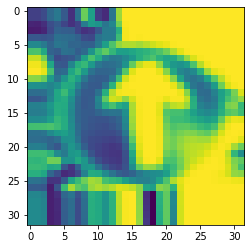

In [34]:
plt.imshow(images[0])
plt.show( )

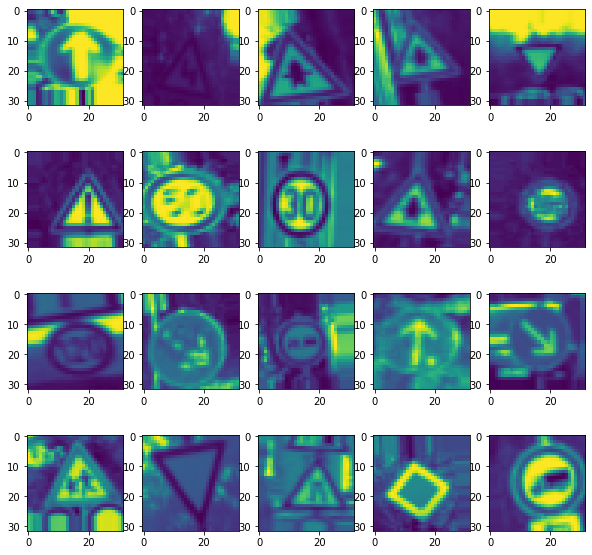

In [36]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(images[i])
plt.show()

In [37]:
from tensorflow.keras.utils import to_categorical

In [38]:
targets_train=to_categorical(targets_train)

In [39]:
targets_train.shape

(27839, 43)

In [40]:
features_train.shape

(27839, 32, 32, 1)

# Step 1: Specify architecture 

In [41]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential

In [44]:
model = Sequential() 
model.add(Conv2D(60,(3,3),activation="relu",input_shape=(32,32,1))) 
model.add(Conv2D(60,(3,3),activation="relu")) 
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(Conv2D(30,(3,3),activation="relu")) 
model.add(Conv2D(30,(3,3),activation="relu")) 
model.add(MaxPooling2D((2,2))) 
model.add(Dropout(0.5)) 
model.add(Flatten()) 
model.add(Dense(500, activation="relu"))
model.add(Dense(43, activation="softmax"))

# Step 2 : Compile the model

In [45]:
from tensorflow.keras.optimizers import Adam

In [46]:
model.compile(Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

# Step 3: Train the model

In [47]:
model.fit_generator(dataGen.flow(features_train,targets_train,batch_size=20), epochs=20)

C:\Users\Nidhish\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1392/1392 [==============================] - 75s 53ms/step - loss: 1.9377 - accuracy: 0.4550
Epoch 2/20
1392/1392 [==============================] - 75s 54ms/step - loss: 0.5999 - accuracy: 0.8159
Epoch 3/20
1392/1392 [==============================] - 78s 56ms/step - loss: 0.3762 - accuracy: 0.8860
Epoch 4/20
1392/1392 [==============================] - 85s 61ms/step - loss: 0.2869 - accuracy: 0.9114
Epoch 5/20
1392/1392 [==============================] - 91s 65ms/step - loss: 0.2360 - accuracy: 0.9270
Epoch 6/20
1392/1392 [==============================] - 93s 67ms/step - loss: 0.2008 - accuracy: 0.9382
Epoch 7/20
1392/1392 [==============================] - 92s 66ms/step - loss: 0.1801 - accuracy: 0.9449
Epoch 8/20
1392/1392 [==============================] - 75s 54ms/step - loss: 0.1618 - accuracy: 0.9508
Epoch 9/20
1392/1392 [==============================] - 76s 55ms/step - loss: 0.1652 - accuracy: 0.9510
Epoch 10/20
1392/1392 [==============================] - 77s 55m

In [48]:
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 32, 32, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "batch_input_shape": [null, 32, 32, 1], "dtype": "float32", "filters": 60, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Conv2D", "config": {"name": "conv2d_1", "trainable": true, "dtype": "float32", "filters": 60, "kernel_size": [3, 3], "strides": [1, 1], "padding": "vali

In [49]:
ModelInJson=model.to_json()

In [50]:
abc= open("C:/Users/Nidhish/Downloads/AI/TrafficSignal.json","w")
abc.write(ModelInJson)
abc.close()

In [51]:
model.save_weights("C:/Users/Nidhish/Downloads/AI/TrafficSignalWeights.h5")

In [ ]:
from tensorflow.keras.models import model_from_json

In [8]:
abc= open("C:/Users/Nidhish/Downloads/AI/TrafficSignal.json","r")
loaded_data=abc.read()
loaded_model=model_from_json(loaded_data)
loaded_model.load_weights("C:/Users/Nidhish/Downloads/AI/TrafficSignalWeights.h5")

# # Step 4 : Test the model

In [1]:
import cv2
import numpy as np

In [2]:
capt=cv2.VideoCapture(0)
capt.set(3,640)
capt.set(4,480)
capt.set(10,180)

False

In [3]:
def preprocessing(image):
    image= cv2.cvtColor( image, cv2.COLOR_BGR2GRAY)
    image= image/255
    
    
    return image

In [4]:
def getClassname(classNo):
    if classNo == 0:    return 'Speed limit (20km/h)'
    elif classNo == 1:    return 'Speed limit (30km/h)'
    elif classNo == 2:    return 'Speed limit (50km/h)'
    elif classNo == 3:    return 'Speed limit (60km/h)'
    elif classNo == 4:    return 'Speed limit (70km/h)'
    elif classNo == 5:    return 'Speed limit (80km/h)'
    elif classNo == 6:    return 'End of speed limit (80km/h)'
    elif classNo == 7:    return 'Speed limit (100km/h)'
    elif classNo == 8:    return 'Speed limit (120km/h)'
    elif classNo == 9:    return 'No passing '
    elif classNo == 10:    return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11:    return 'Right-of-way at the next intersection'
    elif classNo == 12:    return 'Priority road'
    elif classNo == 13:    return 'Yield'
    elif classNo == 14:    return 'Stop'
    elif classNo == 15:    return 'No Vechicles'
    elif classNo == 16:    return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17:    return 'No Entry'
    elif classNo == 18:    return 'General caution'
    elif classNo == 19:    return 'Dangerous curve to the left'
    elif classNo == 20:    return 'Dangerous curve to the right'
    elif classNo == 21:    return 'Double Curve'
    elif classNo == 22:    return 'Bumpy road'
    elif classNo == 23:    return 'Slippery road'
    elif classNo == 24:    return 'Road narrows on the right'
    elif classNo == 25:    return 'Road work'
    elif classNo == 26:    return 'Traffic signals'
    elif classNo == 27:    return 'Pedestrians'
    elif classNo == 28:    return 'Children crossing'
    elif classNo == 29:    return 'Bicycle crossing'
    elif classNo == 30:    return 'Beware of ice/snow'
    elif classNo == 31:    return 'Wild animals crossing'
    elif classNo == 32:    return 'End of all speed and passing limits'
    elif classNo == 33:    return 'Turn right ahead'
    elif classNo == 34:    return 'Turn left ahead'
    elif classNo == 35:    return 'Ahead Only'
    elif classNo == 36:    return 'Go straight or right)'
    elif classNo == 37:    return 'Go straight or left'
    elif classNo == 38:    return 'Keep right'
    elif classNo == 39:    return 'Keep left'
    elif classNo == 40:    return 'Roundabout mandatory'
    elif classNo == 41:    return 'End of no passing'
    elif classNo == 42:    return 'End of no passing by vechiles over 3.5 metric tons'

In [5]:
while True:
    message,image=capt.read()
    imagearr=np.asarray(image)
    imagearr=cv2.resize(imagearr,(32,32))
    imagearr=preprocessing(imagearr)
    imagearr=imagearr.reshape(1,32,32,1)
    predictions=loaded_model.predict(imagearr)
    NeuronIndex=loaded_model.predict_classes(imagearr)
    cv2.putText(image,"Class: ",(20,35),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,225),2)
    cv2.putText(image,"Probablity: ",(20,75),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,225),2)
    ProbablityValue = np.amax(predictions)
    if ProbablityValue > 0.75:
        cv2.putText(image,getClassname(NeuronIndex),(120,35),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,225),2)
        cv2.putText(image,str(int(ProbablityValue*100)) + "%",(200,75),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,225),2)
    cv2.imshow("Model Predcition",image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

capt.release()
cv2.destroyAllWindows()

NameError: name 'loaded_model' is not defined